In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv('./data/population_Final.csv', encoding='EUC-KR')
pop

,행정구역,인구수
0,전체,51349072
1,서울,9577030
2,부산,3385964
3,대구,2927925
4,인천,2428301
5,광주,1469981
6,대전,1450439
7,울산,1144299


## 버거킹

In [3]:
bg = pd.read_csv('./data/BurgerKing.csv', encoding='EUC-KR')

In [4]:
bg

,행정구역,매장수
0,서울특별시,106
1,부산광역시,19
2,대구광역시,20
3,인천광역시,19
4,광주광역시,12
5,대전광역시,10
6,울산광역시,5


In [5]:
type(bg)

pandas.core.frame.DataFrame

In [6]:
bg.sum()

행정구역    서울특별시부산광역시대구광역시인천광역시광주광역시대전광역시울산광역시
매장수                                     191
dtype: object

In [7]:
bg_sum = pd.DataFrame(bg.sum(), columns=['계'])
bg_sum

,계
행정구역,서울특별시부산광역시대구광역시인천광역시광주광역시대전광역시울산광역시
매장수,191


In [8]:
bg = bg.append(bg_sum.T)
bg

,행정구역,매장수
0,서울특별시,106
1,부산광역시,19
2,대구광역시,20
3,인천광역시,19
4,광주광역시,12
5,대전광역시,10
6,울산광역시,5
계,서울특별시부산광역시대구광역시인천광역시광주광역시대전광역시울산광역시,191


In [9]:
bg.loc['계', '행정구역']   = '전체'
bg

,행정구역,매장수
0,서울특별시,106
1,부산광역시,19
2,대구광역시,20
3,인천광역시,19
4,광주광역시,12
5,대전광역시,10
6,울산광역시,5
계,전체,191


In [10]:
bg.loc[0, '행정구역'] = '서울'
bg.loc[1, '행정구역'] = '부산'
bg.loc[2, '행정구역'] = '대구'
bg.loc[3, '행정구역'] = '인천'
bg.loc[4, '행정구역'] = '광주'
bg.loc[5, '행정구역'] = '대전'
bg.loc[6, '행정구역'] = '울산'

bg

,행정구역,매장수
0,서울,106
1,부산,19
2,대구,20
3,인천,19
4,광주,12
5,대전,10
6,울산,5
계,전체,191


In [11]:
bg = pd.merge(bg,pop, on= '행정구역')

In [12]:
bg

,행정구역,매장수,인구수
0,서울,106,9577030
1,부산,19,3385964
2,대구,20,2927925
3,인천,19,2428301
4,광주,12,1469981
5,대전,10,1450439
6,울산,5,1144299
7,전체,191,51349072


In [13]:
bg = bg.drop(7, axis=0)
bg

,행정구역,매장수,인구수
0,서울,106,9577030
1,부산,19,3385964
2,대구,20,2927925
3,인천,19,2428301
4,광주,12,1469981
5,대전,10,1450439
6,울산,5,1144299


In [14]:
bg['매장비율'] = (bg['매장수']/bg['매장수'].sum())*100
bg

,행정구역,매장수,인구수,매장비율
0,서울,106,9577030,55.4974
1,부산,19,3385964,9.94764
2,대구,20,2927925,10.4712
3,인천,19,2428301,9.94764
4,광주,12,1469981,6.28272
5,대전,10,1450439,5.2356
6,울산,5,1144299,2.6178


In [15]:
bg['인구비율'] = (bg['인구수']/bg['인구수'].sum())*100
bg

,행정구역,매장수,인구수,매장비율,인구비율
0,서울,106,9577030,55.4974,42.785276
1,부산,19,3385964,9.94764,15.126757
2,대구,20,2927925,10.4712,13.080473
3,인천,19,2428301,9.94764,10.848408
4,광주,12,1469981,6.28272,6.567124
5,대전,10,1450439,5.2356,6.479820
6,울산,5,1144299,2.6178,5.112143


In [16]:
bg['매장/인구'] = bg['매장비율']/bg['인구비율']
bg

,행정구역,매장수,인구수,매장비율,인구비율,매장/인구
0,서울,106,9577030,55.4974,42.785276,1.29711
1,부산,19,3385964,9.94764,15.126757,0.657619
2,대구,20,2927925,10.4712,13.080473,0.800522
3,인천,19,2428301,9.94764,10.848408,0.916968
4,광주,12,1469981,6.28272,6.567124,0.956693
5,대전,10,1450439,5.2356,6.479820,0.807986
6,울산,5,1144299,2.6178,5.112143,0.512075


In [17]:
bg.to_csv('BurgerKing_pop.csv',encoding='EUC-KR', index= False)

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline

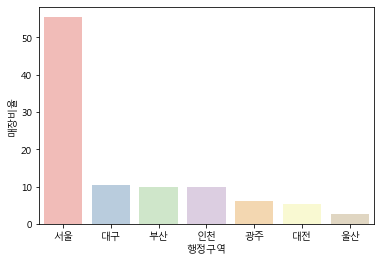

In [19]:
sns.barplot(x= '행정구역', y ='매장비율', data=bg.sort_values('매장비율',ascending=False),palette='Pastel1')
plt.title = '버거킹 매장 비율'
plt.show()

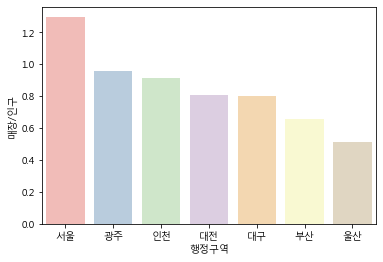

In [20]:
sns.barplot(x= '행정구역', y ='매장/인구', data=bg.sort_values('매장/인구',ascending=False),palette='Pastel1')
plt.title = '버거킹 매장/인구 비율'
plt.show()

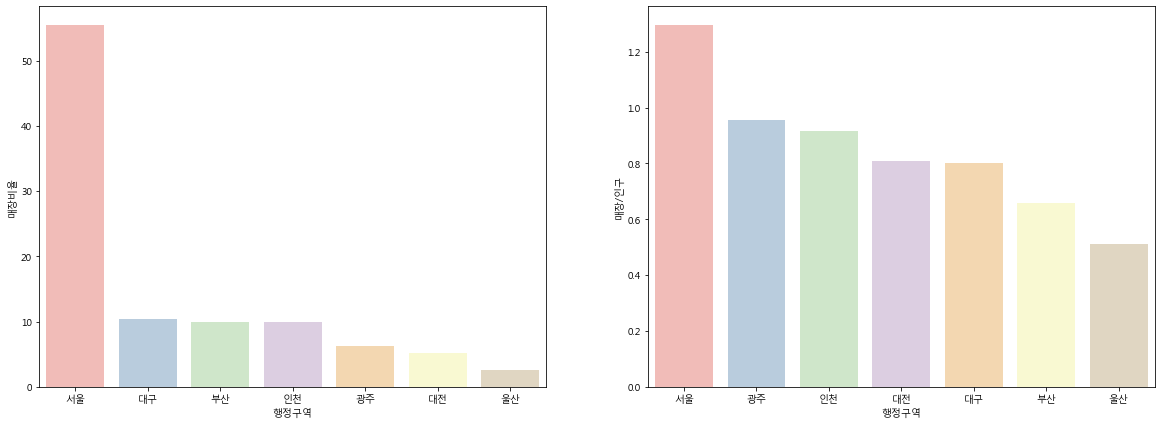

In [21]:
plt.rcParams["figure.figsize"] = (20,7)
plt.subplot(121)
sns.barplot(x= '행정구역', y ='매장비율', data=bg.sort_values('매장비율',ascending=False),palette='Pastel1')
plt.subplot(122)
sns.barplot(x= '행정구역', y ='매장/인구', data=bg.sort_values('매장/인구',ascending=False),palette='Pastel1')
plt.show()

## 서브웨이

In [22]:
sb = pd.read_csv('./data/Subway.csv', encoding='EUC-KR')
sb

,행정구역,매장수
0,서울,142
1,광주,4
2,대구,13
3,대전,20
4,부산,36
5,울산,7
6,인천,19


In [23]:
sb = pd.merge(sb,pop, on= '행정구역')
sb

,행정구역,매장수,인구수
0,서울,142,9577030
1,광주,4,1469981
2,대구,13,2927925
3,대전,20,1450439
4,부산,36,3385964
5,울산,7,1144299
6,인천,19,2428301


In [24]:
sb['매장비율'] = (sb['매장수']/sb['매장수'].sum())*100
sb['인구비율'] = (sb['인구수']/sb['인구수'].sum())*100
sb['매장/인구'] = sb['매장비율']/sb['인구비율']
sb

,행정구역,매장수,인구수,매장비율,인구비율,매장/인구
0,서울,142,9577030,58.921162,42.785276,1.377136
1,광주,4,1469981,1.659751,6.567124,0.252736
2,대구,13,2927925,5.394191,13.080473,0.412385
3,대전,20,1450439,8.298755,6.479820,1.280708
4,부산,36,3385964,14.937759,15.126757,0.987506
5,울산,7,1144299,2.904564,5.112143,0.568170
6,인천,19,2428301,7.883817,10.848408,0.726726


In [25]:
sb.to_csv('Subway_pop.csv',encoding='EUC-KR', index= False)

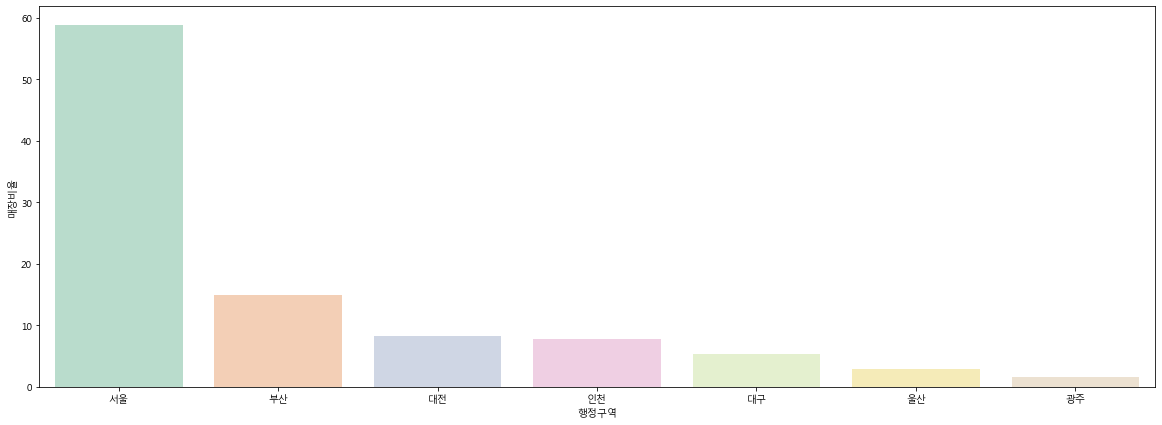

In [26]:
sns.barplot(x= '행정구역', y ='매장비율', data=sb.sort_values('매장비율',ascending=False),palette='Pastel2')
plt.title = '서브웨이 매장 비율'
plt.show()

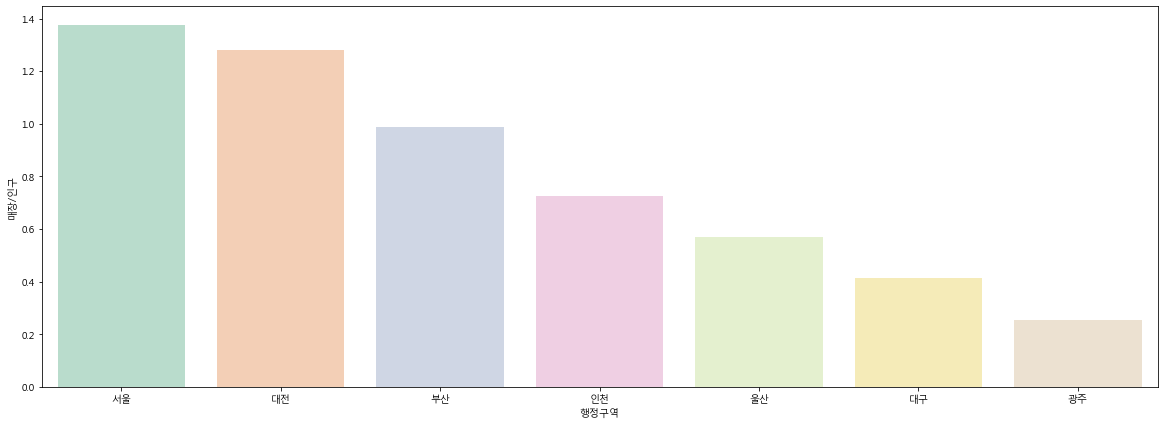

In [27]:
sns.barplot(x= '행정구역', y ='매장/인구', data=sb.sort_values('매장/인구',ascending=False),palette='Pastel2')
plt.title = '버거킹 매장/인구 비율'
plt.show()

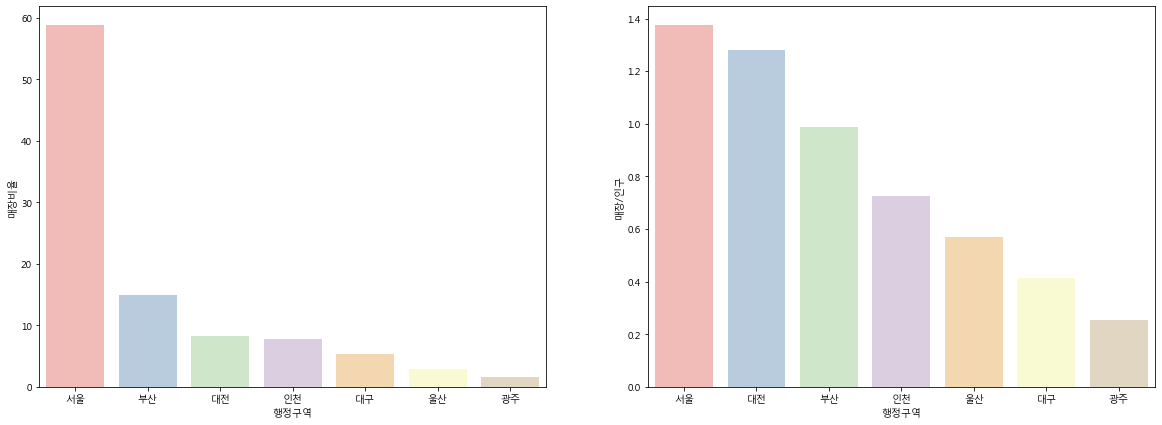

In [28]:
plt.rcParams["figure.figsize"] = (20,7)
plt.subplot(121)
sns.barplot(x= '행정구역', y ='매장비율', data=sb.sort_values('매장비율',ascending=False),palette='Pastel1')
plt.subplot(122)
sns.barplot(x= '행정구역', y ='매장/인구', data=sb.sort_values('매장/인구',ascending=False),palette='Pastel1')
plt.show()